<center><h1><font color='green'><b>Importing Libraries<b></font></h1></center>

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import scipy


warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

<center><h1><font color='green'><b>Reading Data From CSV</b></font></h1></center>

In [2]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_sample = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


<center><h1><font color='green'><b>Combining Train and Test Data</b></font></h1></center>

In [6]:
target = df_train['SalePrice']
ids = df_test['Id']

train = df_train.drop(['Id','SalePrice'],axis=1)
test = df_test.drop('Id',axis=1)

df1 = pd.concat([train,test],axis=0).reset_index(drop=True)

In [7]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [8]:
df1['MSSubClass'] = df1['MSSubClass'].astype(str)

In [9]:
df1.shape

(2919, 79)

In [10]:
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [12]:
df2 = df1.copy()

<center><h1><font color='green'><b>Checking Null Values</b></font></h1></center>

In [13]:
nan_object_col = df2.select_dtypes('object').isnull().sum() > 0 
nan_object_col[nan_object_col == True]

MSZoning        True
Alley           True
Utilities       True
Exterior1st     True
Exterior2nd     True
MasVnrType      True
BsmtQual        True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
Electrical      True
KitchenQual     True
Functional      True
FireplaceQu     True
GarageType      True
GarageFinish    True
GarageQual      True
GarageCond      True
PoolQC          True
Fence           True
MiscFeature     True
SaleType        True
dtype: bool

<center><h1><font color='green'><b>Fill Null Values</b></font></h1></center>

In [14]:
for column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
]:
    df2[column] = df2[column].fillna("None")

    
for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
]:
    df2[column] = df2[column].fillna(df2[column].mode()[0])

In [15]:
nan_number_col = df2.select_dtypes(np.number).isnull().sum() > 0
nan_number_col[nan_number_col == True]

LotFrontage     True
MasVnrArea      True
BsmtFinSF1      True
BsmtFinSF2      True
BsmtUnfSF       True
TotalBsmtSF     True
BsmtFullBath    True
BsmtHalfBath    True
GarageYrBlt     True
GarageCars      True
GarageArea      True
dtype: bool

In [16]:
for column in [
    'LotFrontage',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'BsmtFullBath',
    'BsmtHalfBath',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea'
]:
    df2[column] = df2[column].fillna(df2[column].mean())

In [17]:
df3 = df2.copy()

In [18]:
df3.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal


<center><h1><font color='green'><b>Checking Outliears</b></font></h1></center>

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

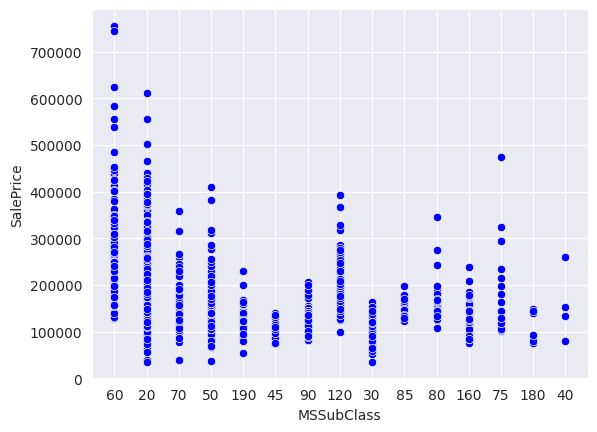

In [19]:
sns.scatterplot(x=df3['MSSubClass'],y=target,color='blue')

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

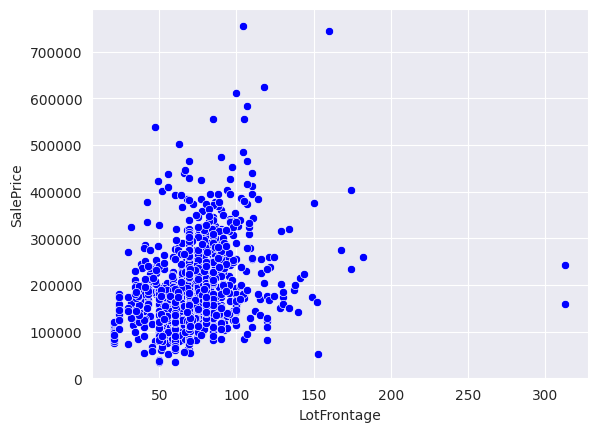

In [20]:
sns.scatterplot(x=df3['LotFrontage'],y=target,color='blue')

In [21]:
df3.query('LotFrontage > 250')
# 934, 1298

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
934,20,RL,313.0,27650,Pave,None,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425.0,Unf,0.0,160.0,585.0,GasA,Ex,Y,SBrkr,2069,0,0,2069,1.0,0.0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2.0,505.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,11,2008,WD,Normal
1298,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,None,None,0,1,2008,New,Partial


<Axes: xlabel='LotArea', ylabel='SalePrice'>

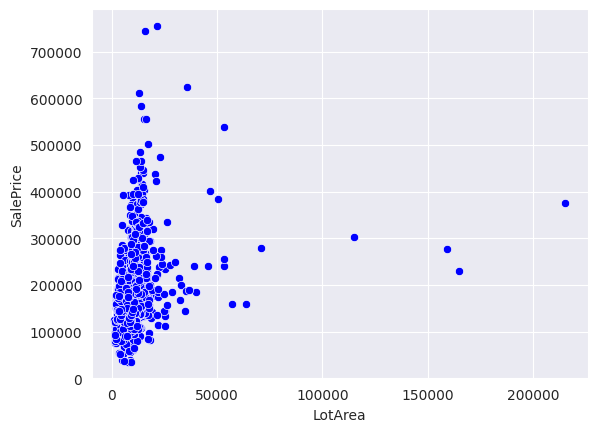

In [22]:
sns.scatterplot(x=df3['LotArea'],y=target,color='blue')

In [23]:
df3.query('LotArea > 150000')
# 249,313,335

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
249,50,RL,69.305795,159000,Pave,None,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,0,2144,0.0,1.0,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2.0,389.0,TA,TA,Y,0,98,0,0,0,0,None,None,Shed,500,6,2007,WD,Normal
313,20,RL,150.000000,215245,Pave,None,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236.0,Rec,820.0,80.0,2136.0,GasW,TA,Y,SBrkr,2036,0,0,2036,2.0,0.0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2.0,513.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,6,2009,WD,Normal
335,190,RL,69.305795,164660,Grvl,None,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,BrkFace,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249.0,BLQ,147.0,103.0,1499.0,GasA,Ex,Y,SBrkr,1619,167,0,1786,2.0,0.0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2.0,529.0,TA,TA,Y,670,0,0,0,0,0,None,None,Shed,700,8,2008,WD,Normal


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

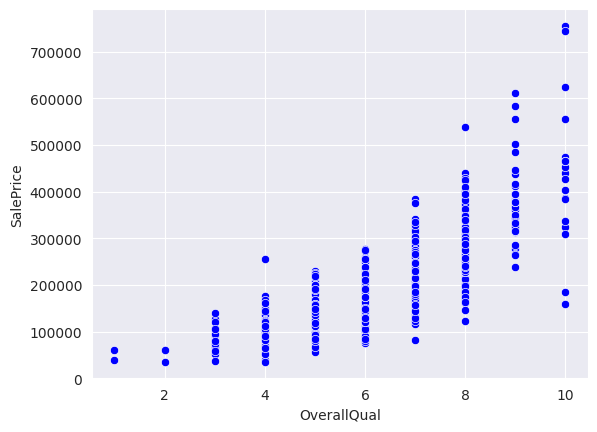

In [24]:
sns.scatterplot(x=df3['OverallQual'], y=target,color='blue')

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

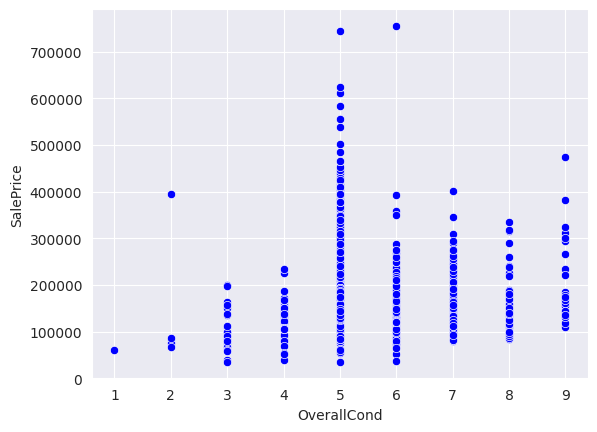

In [25]:
sns.scatterplot(x=df3['OverallCond'], y=target,color='blue')

In [26]:
df3.query('OverallCond == 2')
# 378

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
88,50,C (all),105.000000,8470,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,BrkFace,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1013.0,1013.0,GasA,TA,N,SBrkr,1013,0,513,1526,0.0,0.0,1,0,2,1,Fa,6,Typ,0,None,None,1978.113406,None,0.0,0.0,None,None,N,0,0,156,0,0,0,None,MnPrv,None,0,10,2009,ConLD,Abnorml
250,30,RL,55.000000,5350,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,3,2,1940,1966,Gable,CompShg,Wd Sdng,Plywood,BrkFace,0.0,TA,Po,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,728.0,728.0,GasA,Ex,Y,SBrkr,1306,0,0,1306,0.0,0.0,1,0,3,1,Fa,6,Mod,0,None,None,1978.113406,None,0.0,0.0,None,None,Y,263,0,0,0,0,0,None,GdWo,Shed,450,5,2010,WD,Normal
378,20,RL,88.000000,11394,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,2,2010,2010,Hip,CompShg,VinylSd,VinylSd,Stone,350.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1445.0,Unf,0.0,411.0,1856.0,GasA,Ex,Y,SBrkr,1856,0,0,1856,1.0,0.0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2010.000000,Fin,3.0,834.0,TA,TA,Y,113,0,0,0,0,0,None,None,None,0,6,2010,New,Partial
398,30,RM,60.000000,8967,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,2,1920,1950,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,Fa,BrkTil,Fa,Po,No,Unf,0.0,Unf,0.0,961.0,961.0,GasA,Gd,Y,Mix,1077,0,0,1077,0.0,0.0,1,0,2,1,TA,6,Maj2,0,None,Detchd,1920.000000,Unf,1.0,338.0,Po,Po,N,0,0,0,0,0,0,None,None,None,0,11,2007,WD,Abnorml
676,70,RM,60.000000,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,2,1900,1950,Gable,CompShg,AsbShng,Stucco,BrkFace,0.0,TA,TA,BrkTil,TA,Fa,No,Unf,0.0,Unf,0.0,1095.0,1095.0,GasW,Fa,N,SBrkr,1095,679,0,1774,1.0,0.0,2,0,4,2,TA,8,Min2,0,None,2Types,1920.000000,Unf,3.0,779.0,Fa,Fa,N,0,0,90,0,0,0,None,None,None,0,5,2006,WD,Normal
1536,30,RM,68.000000,9656,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,BrkFace,0.0,TA,Fa,BrkTil,Fa,Fa,No,Unf,0.0,Unf,0.0,678.0,678.0,GasA,TA,N,SBrkr,832,0,0,832,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1928.000000,Unf,2.0,780.0,Fa,Fa,N,0,0,0,0,0,0,None,None,None,0,6,2010,WD,Abnorml
1594,50,RL,51.000000,9839,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,2,1931,1950,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,TA,TA,PConc,TA,Fa,No,Unf,0.0,Unf,0.0,894.0,894.0,GasA,Ex,Y,SBrkr,894,772,0,1666,1.0,0.0,1,0,3,1,TA,7,Typ,1,Gd,None,1978.113406,None,0.0,0.0,None,None,N,0,156,0,0,0,0,None,None,None,0,5,2010,WD,Normal
1619,90,RL,70.000000,7700,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,2Story,5,2,1985,1986,Gable,CompShg,HdBoard,HdBoard,BrkFace,0.0,TA,Po,PConc,TA,TA,No,Unf,0.0,Unf,0.0,1216.0,1216.0,GasA,Gd,Y,SBrkr,1216,1216,0,2432,0.0,0.0,4,2,4,2,TA,10,Typ,0,None,Attchd,1985.000000,Unf,2.0,616.0,TA,Fa,Y,200,0,0,0,0,0,None,None,Shed,600,2,2010,WD,Normal
1847,20,RL,69.305795,9000,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,0.0,TA,TA,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,None,None,1978.113406,None,0.0,0.0,None,None,N,0,0,100,0,0,0,None,None,None,0,6,2009,WD,Norm

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

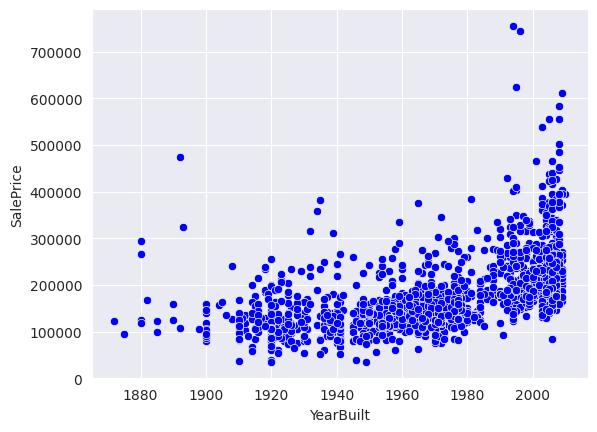

In [27]:
sns.scatterplot(x=df3['YearBuilt'], y=target,color='blue')

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

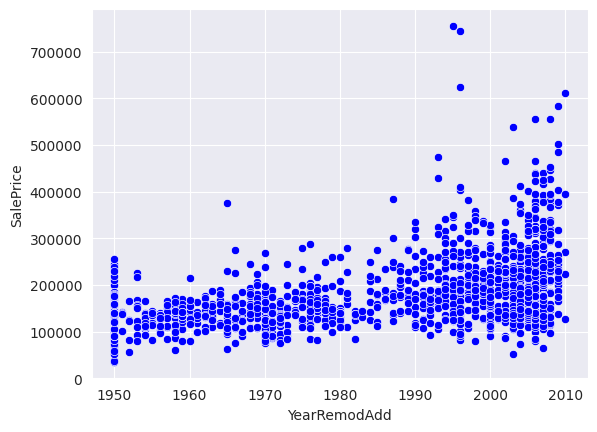

In [28]:
sns.scatterplot(x=df3['YearRemodAdd'], y=target,color='blue')

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

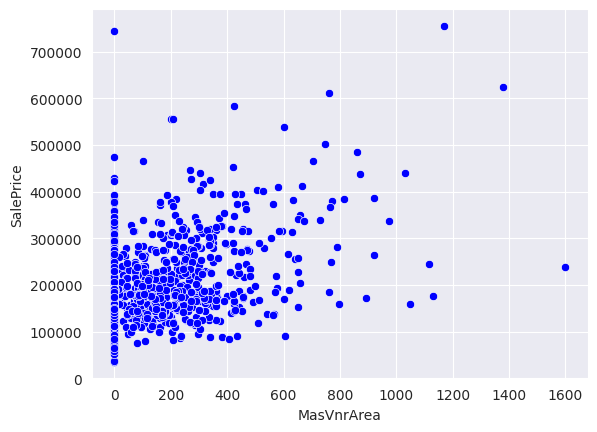

In [29]:
sns.scatterplot(x=df3['MasVnrArea'], y=target,color='blue')

In [30]:
df3.query('MasVnrArea > 1300')
# 297, 1169

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
297,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649.0,Unf,0.0,326.0,975.0,GasA,Ex,Y,SBrkr,975,975,0,1950,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Detchd,1997.0,RFn,2.0,576.0,TA,TA,Y,0,10,0,0,198,0,None,None,None,0,6,2007,WD,Normal
1169,60,RL,118.0,35760,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387.0,Unf,0.0,543.0,1930.0,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1.0,0.0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3.0,807.0,TA,TA,Y,361,76,0,0,0,0,None,None,None,0,7,2006,WD,Normal


<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

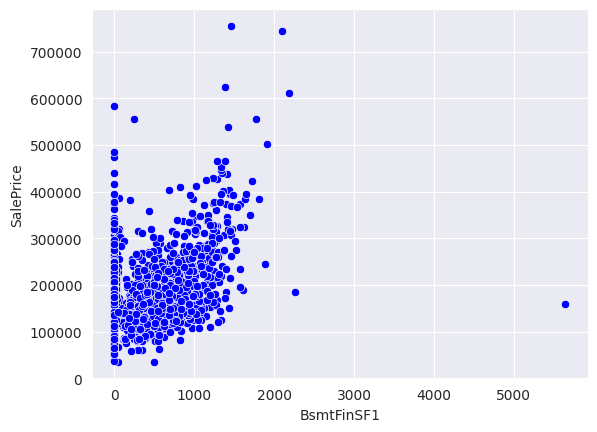

In [31]:
sns.scatterplot(x=df3['BsmtFinSF1'], y=target,color='blue')


In [32]:
df3.query('BsmtFinSF1 > 3000')
# 1298, 2549

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1298,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,None,None,0,1,2008,New,Partial
2549,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,None,None,None,17000,10,2007,New,Partial


<Axes: xlabel='BsmtFinSF2', ylabel='SalePrice'>

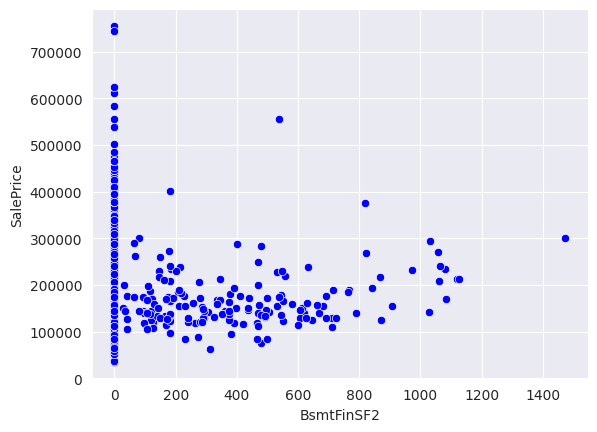

In [33]:
sns.scatterplot(x=df3['BsmtFinSF2'], y=target,color='blue')

In [34]:
df3.query('BsmtFinSF2 > 1300')
# 322,1698,2682

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
322,60,RL,86.000000,10380,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1986,1987,Gable,CompShg,Plywood,Plywood,BrkFace,172.0,Gd,TA,CBlock,TA,TA,Gd,LwQ,28.0,ALQ,1474.0,0.0,1502.0,GasA,Ex,Y,SBrkr,1553,1177,0,2730,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1987.0,Fin,2.0,576.0,TA,TA,Y,201,96,0,0,0,0,None,MnPrv,None,0,8,2007,WD,Normal
1698,20,RL,69.305795,10750,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,5,1994,1995,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,634.0,Gd,TA,PConc,Gd,TA,Av,BLQ,236.0,GLQ,1526.0,262.0,2024.0,GasA,Ex,Y,SBrkr,2063,0,0,2063,1.0,0.0,2,0,3,1,Gd,7,Typ,2,Gd,Attchd,1994.0,Fin,3.0,815.0,TA,TA,Y,182,56,0,0,0,0,None,None,None,0,6,2009,WD,Normal
2682,60,RL,114.000000,17242,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,9,5,1993,1994,Hip,CompShg,MetalSd,MetalSd,BrkFace,738.0,Gd,Gd,PConc,Ex,TA,Gd,Rec,292.0,GLQ,1393.0,48.0,1733.0,GasA,Ex,Y,SBrkr,1933,1567,0,3500,1.0,0.0,3,1,4,1,Ex,11,Typ,1,TA,Attchd,1993.0,RFn,3.0,959.0,TA,TA,Y,870,86,0,0,210,0,None,None,None,0,5,2006,WD,Normal


<Axes: xlabel='BsmtUnfSF', ylabel='SalePrice'>

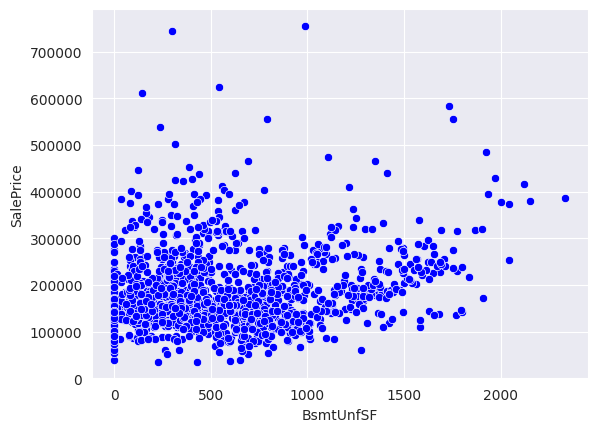

In [35]:
sns.scatterplot(x=df3['BsmtUnfSF'], y=target,color='blue')

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

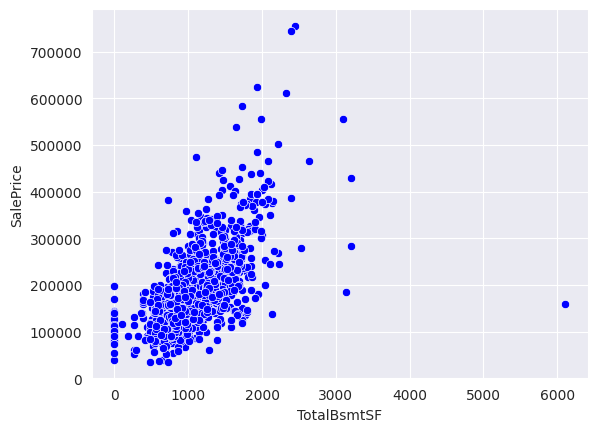

In [36]:
sns.scatterplot(x=df3['TotalBsmtSF'], y=target,color='blue')

In [37]:
df3.query('TotalBsmtSF > 5000')
# 1298, 2549

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1298,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,None,None,0,1,2008,New,Partial
2549,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,None,None,None,17000,10,2007,New,Partial


<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

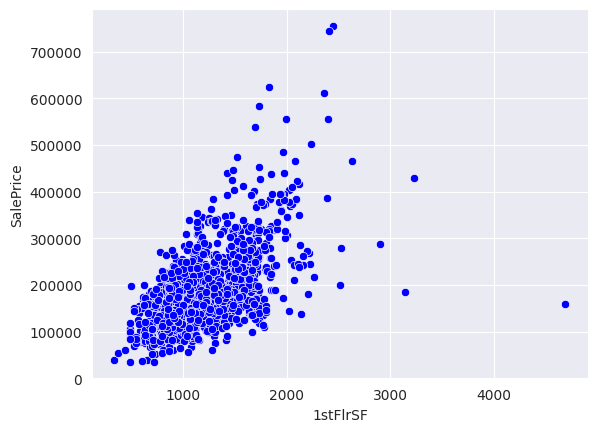

In [38]:
sns.scatterplot(x=df3['1stFlrSF'], y=target,color='blue')

<Axes: xlabel='2ndFlrSF', ylabel='SalePrice'>

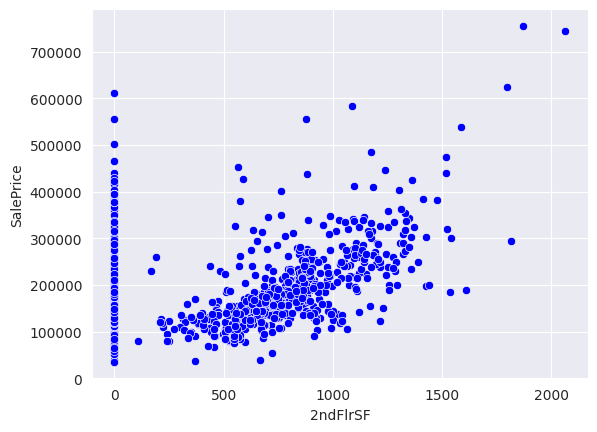

In [39]:
sns.scatterplot(x=df3['2ndFlrSF'], y=target,color='blue')

<Axes: xlabel='LowQualFinSF', ylabel='SalePrice'>

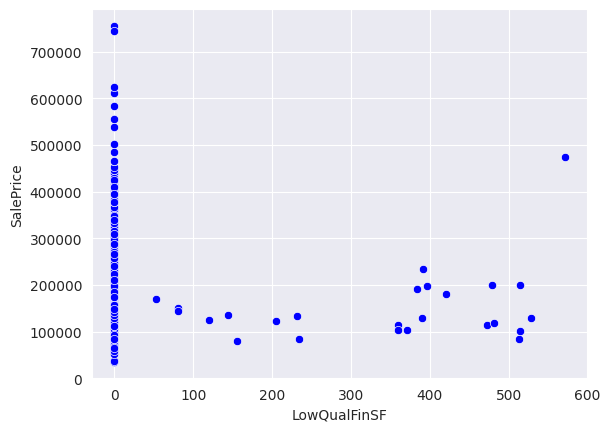

In [40]:
sns.scatterplot(x=df3['LowQualFinSF'], y=target,color='blue')

In [41]:
df3.query('LowQualFinSF > 580')
# 1785, 2130

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1785,50,RL,60.0,10410,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,4,5,1915,1950,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,1313.0,1313.0,GasA,TA,Y,SBrkr,1313,0,1064,2377,0.0,0.0,2,0,3,1,Gd,8,Min2,1,TA,Detchd,1954.0,Unf,2.0,528.0,TA,TA,Y,0,0,432,0,0,0,None,None,None,0,6,2009,WD,Normal
2130,50,RM,60.0,6876,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,6,1938,1958,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,1272.0,1272.0,GasA,TA,Y,SBrkr,1272,0,697,1969,0.0,0.0,2,0,4,1,TA,9,Min1,1,Gd,Detchd,1938.0,Unf,2.0,400.0,TA,TA,Y,0,34,0,0,0,0,None,None,None,0,11,2008,COD,Normal


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

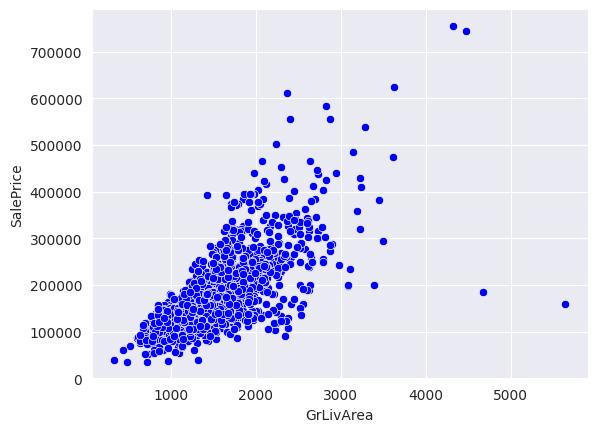

In [42]:
sns.scatterplot(x=df3['GrLivArea'], y=target,color='blue')

In [43]:
df3.query('GrLivArea > 4000')
# 523,691,1182,1298,2549

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
523,60,RL,130.0,40094,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,None,None,None,0,10,2007,New,Partial
691,60,RL,104.0,21535,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0.0,1.0,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3.0,832.0,TA,TA,Y,382,50,0,0,0,0,None,None,None,0,1,2007,WD,Normal
1182,60,RL,160.0,15623,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,BrkFace,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096.0,Unf,0.0,300.0,2396.0,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1.0,0.0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3.0,813.0,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,None,0,7,2007,WD,Abnorml
1298,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,None,None,0,1,2008,New,Partial
2549,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,None,None,None,17000,10,2007,New,Partial


<Axes: xlabel='BsmtFullBath', ylabel='SalePrice'>

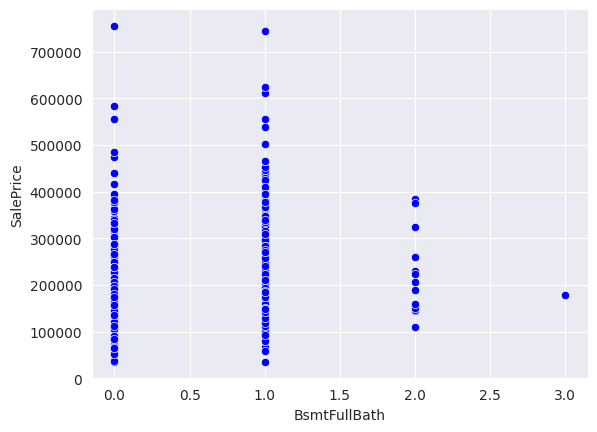

In [44]:
sns.scatterplot(x=df3['BsmtFullBath'], y=target,color='blue')

<Axes: xlabel='BsmtHalfBath', ylabel='SalePrice'>

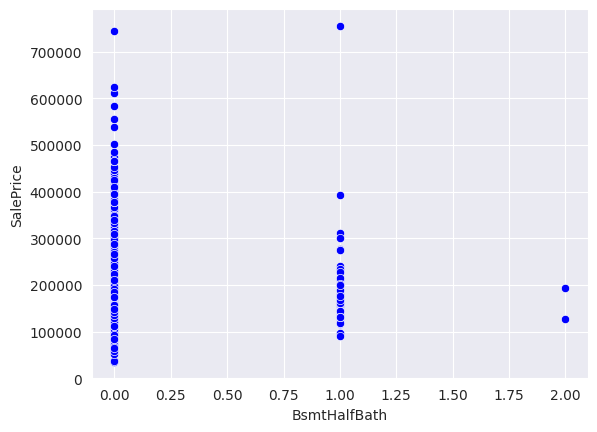

In [45]:
sns.scatterplot(x=df3['BsmtHalfBath'], y=target,color='blue')

<Axes: xlabel='FullBath', ylabel='SalePrice'>

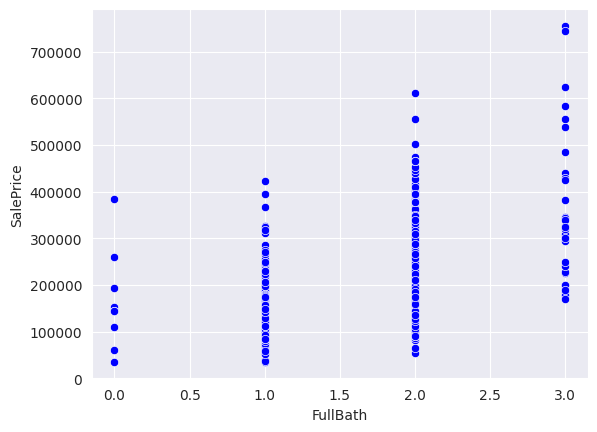

In [46]:
sns.scatterplot(x=df3['FullBath'], y=target,color='blue')

<Axes: xlabel='HalfBath', ylabel='SalePrice'>

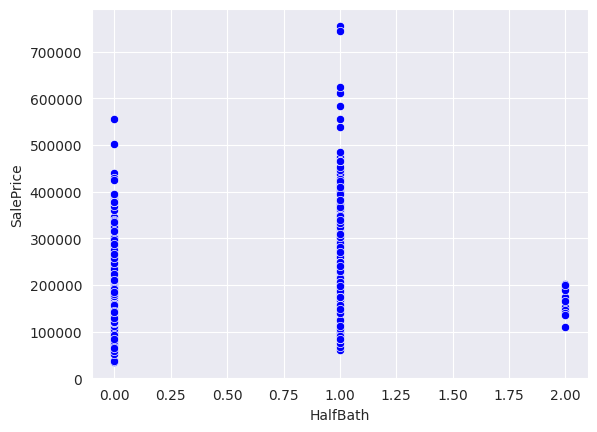

In [47]:
sns.scatterplot(x=df3['HalfBath'], y=target,color='blue')

<Axes: xlabel='BedroomAbvGr', ylabel='SalePrice'>

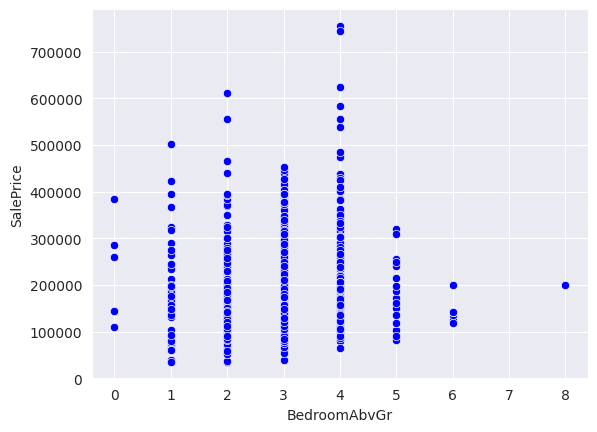

In [48]:
sns.scatterplot(x=df3['BedroomAbvGr'], y=target,color='blue')

In [49]:
df3.query('BedroomAbvGr == 8')
# 635

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
635,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,BrkFace,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256.0,Unf,0.0,1184.0,1440.0,GasA,Ex,Y,FuseA,1440,1440,515,3395,0.0,0.0,2,0,8,2,Fa,14,Typ,0,None,None,1978.113406,None,0.0,0.0,None,None,N,0,110,0,0,0,0,None,None,None,0,3,2007,WD,Abnorml


<Axes: xlabel='KitchenAbvGr', ylabel='SalePrice'>

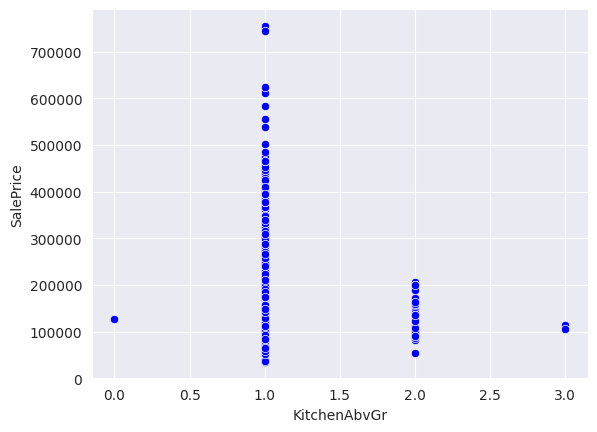

In [50]:
sns.scatterplot(x=df3['KitchenAbvGr'], y=target,color='blue')

<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

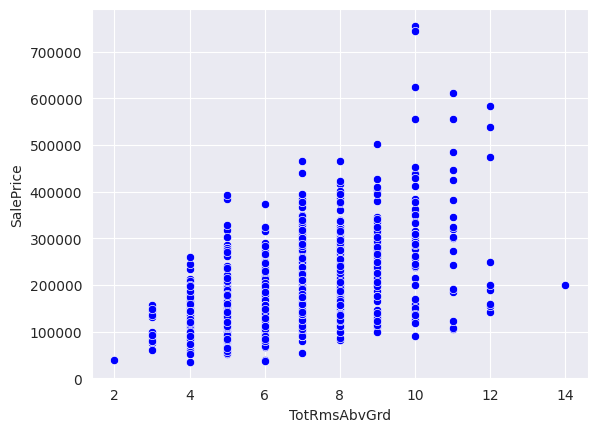

In [51]:
sns.scatterplot(x=df3['TotRmsAbvGrd'], y=target,color='blue')

In [52]:
df3.query('TotRmsAbvGrd == 14')
# 635

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
635,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,BrkFace,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256.0,Unf,0.0,1184.0,1440.0,GasA,Ex,Y,FuseA,1440,1440,515,3395,0.0,0.0,2,0,8,2,Fa,14,Typ,0,None,None,1978.113406,None,0.0,0.0,None,None,N,0,110,0,0,0,0,None,None,None,0,3,2007,WD,Abnorml


<Axes: xlabel='Fireplaces', ylabel='SalePrice'>

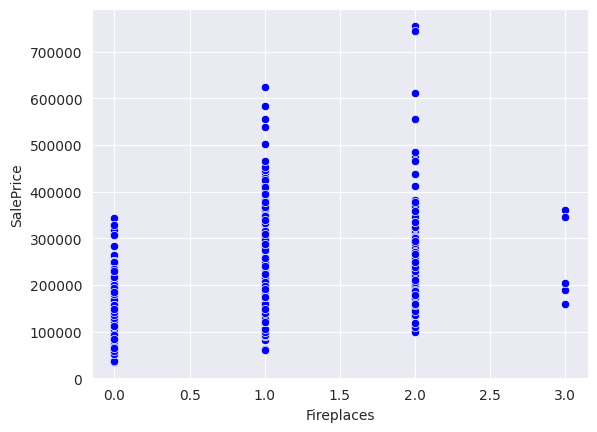

In [53]:
sns.scatterplot(x=df3['Fireplaces'], y=target,color='blue')

<Axes: xlabel='GarageYrBlt', ylabel='SalePrice'>

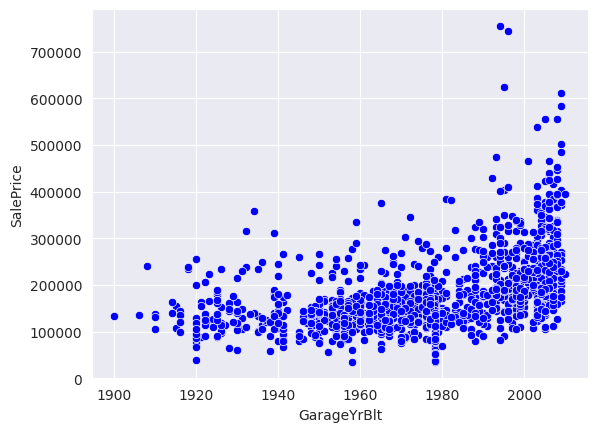

In [54]:
sns.scatterplot(x=df3['GarageYrBlt'], y=target,color='blue')

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

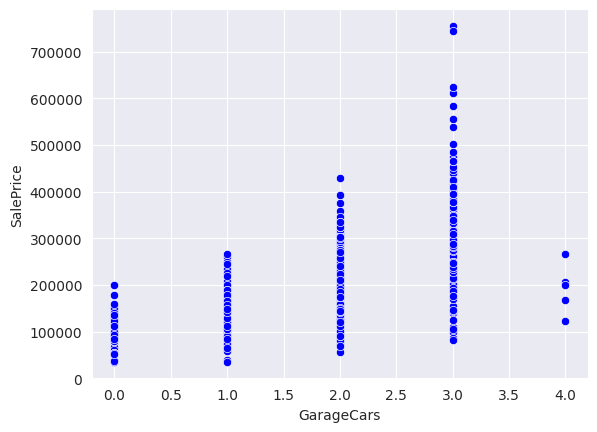

In [55]:
sns.scatterplot(x=df3['GarageCars'], y=target,color='blue')


<Axes: xlabel='GarageArea', ylabel='SalePrice'>

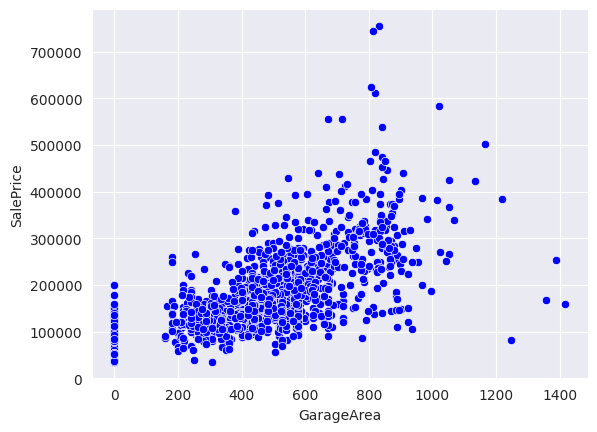

In [56]:
sns.scatterplot(x=df3['GarageArea'], y=target,color='blue')

In [57]:
df3.query('GarageArea > 1300')
# 581,1190,1298,1955,2071,2161

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
581,20,RL,98.000000,12704,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,BrkFace,306.0,Ex,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,2042.0,2042.0,GasA,Ex,Y,SBrkr,2042,0,0,2042,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2009.0,RFn,3.0,1390.0,TA,TA,Y,0,90,0,0,0,0,None,None,None,0,8,2009,New,Partial
1190,190,RL,69.305795,32463,Pave,None,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159.0,Unf,0.0,90.0,1249.0,GasA,Ex,Y,SBrkr,1622,0,0,1622,1.0,0.0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975.0,Fin,4.0,1356.0,TA,TA,Y,439,0,0,0,0,0,None,None,None,0,3,2007,WD,Normal
1298,60,RL,313.000000,63887,Pave,None,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,None,None,0,1,2008,New,Partial
1955,60,RL,69.305795,12511,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,2Story,7,7,1978,1978,Mansard,WdShake,Plywood,Plywood,BrkFace,168.0,Gd,TA,PConc,Gd,TA,No,ALQ,988.0,Unf,0.0,432.0,1420.0,GasA,Ex,Y,SBrkr,1420,1420,0,2840,0.0,1.0,2,1,4,1,Gd,8,Min2,2,Gd,Attchd,1978.0,Fin,4.0,1314.0,TA,Gd,Y,0,16,0,0,208,0,None,MnPrv,None,0,12,2008,WD,Normal
2071,50,RL,60.000000,10836,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,5,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,892.0,892.0,GasA,Ex,Y,SBrkr,1254,182,0,1436,0.0,1.0,1,0,3,1,TA,7,Typ,1,Gd,Detchd,1968.0,Unf,4.0,1488.0,Fa,TA,N,0,0,100,0,0,0,None,GdWo,None,0,6,2008,WD,Normal
2161,20,RL,91.000000,11778,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,554.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,2085.0,Unf,0.0,186.0,2271.0,GasA,Ex,Y,SBrkr,2276,0,0,2276,1.0,0.0,2,0,3,1,Ex,7,Typ,2,Gd,Attchd,2008.0,RFn,3.0,1348.0,Gd,TA,Y,0,0,70,0,255,0,None,None,None,0,6,2008,WD,Abnorml


<Axes: xlabel='WoodDeckSF', ylabel='SalePrice'>

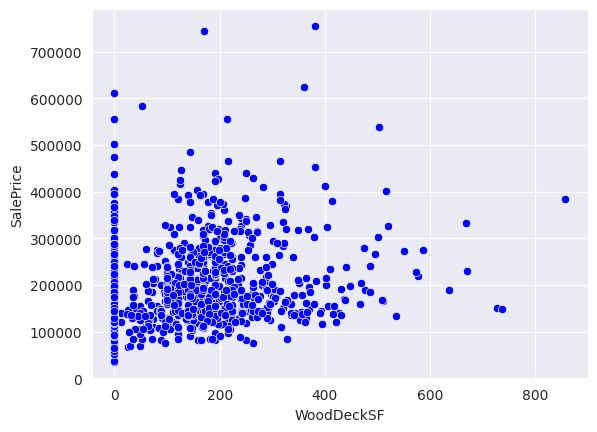

In [58]:
sns.scatterplot(x=df3['WoodDeckSF'], y=target,color='blue')

In [59]:
df3.query('WoodDeckSF > 700')
# 53, 1068, 1459, 2606, 2682

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
53,20,RL,68.000000,50271,Pave,None,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,BrkFace,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810.0,Unf,0.0,32.0,1842.0,GasA,Gd,Y,SBrkr,1842,0,0,1842,2.0,0.0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.0,Fin,3.0,894.0,TA,TA,Y,857,72,0,0,0,0,None,None,None,0,11,2006,WD,Normal
1068,160,RM,42.000000,3964,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,6,4,1973,1973,Gable,CompShg,CemntBd,CmentBd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,837.0,Unf,0.0,105.0,942.0,GasA,Gd,Y,SBrkr,1291,1230,0,2521,1.0,0.0,2,1,5,1,TA,10,Maj1,1,Gd,Attchd,1973.0,Fin,2.0,576.0,TA,TA,Y,728,20,0,0,0,0,None,GdPrv,None,0,6,2006,WD,Normal
1459,20,RL,75.000000,9937,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,BrkFace,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830.0,LwQ,290.0,136.0,1256.0,GasA,Gd,Y,SBrkr,1256,0,0,1256,1.0,0.0,1,1,3,1,TA,6,Typ,0,None,Attchd,1965.0,Fin,1.0,276.0,TA,TA,Y,736,68,0,0,0,0,None,None,None,0,6,2008,WD,Normal
2606,80,RL,69.305795,15957,Pave,None,IR1,Low,AllPub,Corner,Mod,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1977,1977,Gable,CompShg,HdBoard,Plywood,BrkFace,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,1148.0,Unf,0.0,96.0,1244.0,GasA,TA,Y,SBrkr,1356,0,0,1356,2.0,0.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1977.0,Fin,2.0,528.0,TA,TA,Y,1424,0,0,0,0,0,None,MnPrv,None,0,9,2007,WD,Normal
2682,60,RL,114.000000,17242,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,9,5,1993,1994,Hip,CompShg,MetalSd,MetalSd,BrkFace,738.0,Gd,Gd,PConc,Ex,TA,Gd,Rec,292.0,GLQ,1393.0,48.0,1733.0,GasA,Ex,Y,SBrkr,1933,1567,0,3500,1.0,0.0,3,1,4,1,Ex,11,Typ,1,TA,Attchd,1993.0,RFn,3.0,959.0,TA,TA,Y,870,86,0,0,210,0,None,None,None,0,5,2006,WD,Normal


<Axes: xlabel='OpenPorchSF', ylabel='SalePrice'>

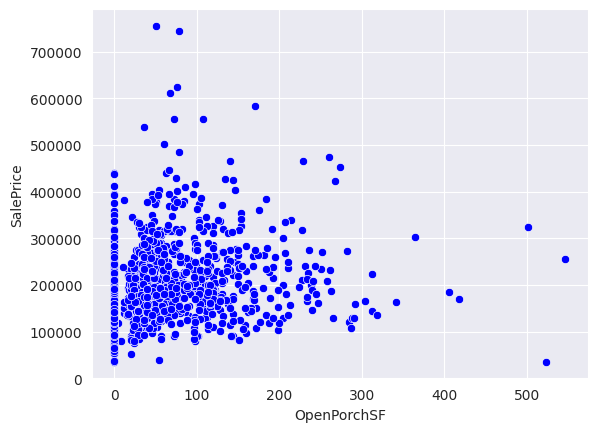

In [60]:
sns.scatterplot(x=df3['OpenPorchSF'], y=target,color='blue')

In [61]:
df3.query('OpenPorchSF > 450')
# 495,583,1328,2486,2549,2557

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
495,30,C (all),60.0,7879,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,0.0,TA,TA,CBlock,TA,TA,No,Rec,495.0,Unf,0.0,225.0,720.0,GasA,TA,N,FuseA,720,0,0,720,0.0,0.0,1,0,2,1,TA,4,Typ,0,None,None,1978.113406,None,0.0,0.0,None,None,N,0,523,115,0,0,0,None,GdWo,None,0,11,2009,WD,Abnorml
583,75,RM,75.0,13500,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,PosA,1Fam,2.5Unf,10,9,1893,2000,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,0.0,Ex,Ex,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,1237.0,1237.0,GasA,Gd,Y,SBrkr,1521,1254,0,2775,0.0,0.0,3,1,3,1,Gd,9,Typ,1,Gd,Detchd,1988.000000,Unf,2.0,880.0,Gd,TA,Y,105,502,0,0,0,0,None,None,None,0,7,2008,WD,Normal
1328,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,7,1920,1950,Gable,CompShg,BrkFace,Wd Sdng,BrkFace,0.0,Gd,Gd,BrkTil,Gd,TA,No,LwQ,493.0,Unf,0.0,1017.0,1510.0,GasW,Ex,Y,SBrkr,1584,1208,0,2792,0.0,0.0,2,0,5,1,TA,8,Mod,2,TA,Detchd,1920.000000,Unf,2.0,520.0,Fa,TA,Y,0,547,0,0,480,0,None,MnPrv,Shed,1150,6,2008,WD,Normal
2486,60,RL,99.0,16779,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,2Story,5,4,1920,1996,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,356.0,TA,Fa,CBlock,Gd,TA,No,BLQ,267.0,Unf,0.0,404.0,671.0,GasA,Fa,Y,SBrkr,1567,1087,0,2654,0.0,0.0,3,0,4,1,TA,11,Mod,1,Gd,Attchd,1946.000000,Unf,2.0,638.0,TA,TA,Y,128,570,0,0,0,0,None,None,Shed,500,5,2007,WD,Normal
2549,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.000000,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,None,None,None,17000,10,2007,New,Partial
2557,90,RL,60.0,10890,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,5,6,1923,1950,Hip,CompShg,Wd Sdng,Plywood,BrkFace,0.0,TA,TA,PConc,TA,TA,Mn,Rec,371.0,Unf,0.0,925.0,1296.0,Grav,Fa,N,FuseA,1296,1296,0,2592,2.0,0.0,2,0,6,2,TA,12,Min2,0,None,None,1978.113406,None,0.0,0.0,None,None,Y,0,742,240,0,0,0,None,None,Shed,1512,1,2007,WD,AdjLand


<Axes: xlabel='EnclosedPorch', ylabel='SalePrice'>

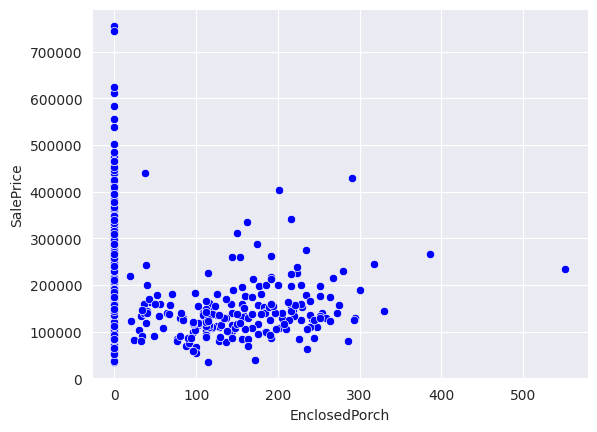

In [62]:
 sns.scatterplot(x=df3['EnclosedPorch'], y=target,color='blue')

In [63]:
df3.query('EnclosedPorch > 400')
# 197, 1785, 2503, 2567, 2880

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
197,75,RL,174.000000,25419,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,BrkFace,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036.0,LwQ,184.0,140.0,1360.0,GasA,Gd,Y,SBrkr,1360,1360,392,3112,1.0,1.0,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2.0,795.0,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,None,0,3,2006,WD,Abnorml
1785,50,RL,60.000000,10410,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,4,5,1915,1950,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,1313.0,1313.0,GasA,TA,Y,SBrkr,1313,0,1064,2377,0.0,0.0,2,0,3,1,Gd,8,Min2,1,TA,Detchd,1954.0,Unf,2.0,528.0,TA,TA,Y,0,0,432,0,0,0,None,None,None,0,6,2009,WD,Normal
2503,50,RL,104.000000,23920,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,1Fam,1.5Fin,6,5,1984,1984,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1105.0,1105.0,GasA,Ex,Y,SBrkr,1105,717,0,1822,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Po,Attchd,1984.0,Unf,2.0,515.0,TA,TA,P,0,195,1012,0,0,444,None,None,None,0,4,2007,WD,Normal
2567,20,RL,69.305795,25485,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,4,1960,1960,Gable,CompShg,Wd Sdng,MetalSd,BrkFace,423.0,TA,Fa,CBlock,TA,Gd,Mn,LwQ,540.0,Rec,1020.0,0.0,1560.0,GasA,TA,Y,SBrkr,1560,0,0,1560,0.0,0.0,1,1,3,1,TA,6,Typ,3,TA,Attchd,1960.0,RFn,2.0,580.0,TA,TA,Y,0,75,584,0,0,0,None,None,None,0,5,2007,WD,Normal
2880,50,RL,66.000000,21780,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,6,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,PConc,TA,Fa,No,Unf,0.0,Unf,0.0,817.0,817.0,GasA,Gd,Y,FuseF,940,610,0,1550,0.0,0.0,1,1,3,1,TA,7,Min2,1,TA,Detchd,1937.0,Unf,1.0,318.0,TA,TA,P,0,0,429,0,0,0,None,MnPrv,None,0,9,2006,WD,Normal


<Axes: xlabel='ScreenPorch', ylabel='SalePrice'>

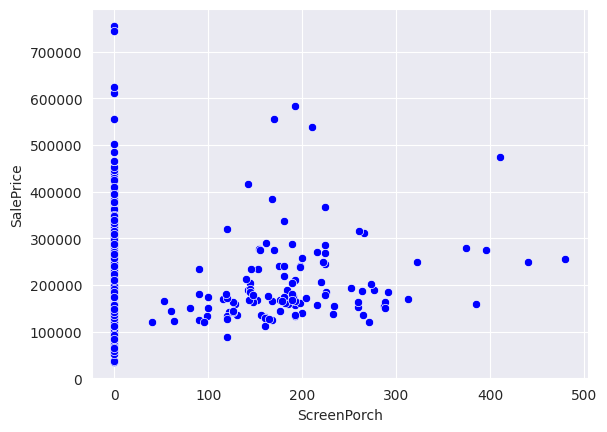

In [64]:
sns.scatterplot(x=df3['ScreenPorch'], y=target,color='blue')

<Axes: xlabel='PoolArea', ylabel='SalePrice'>

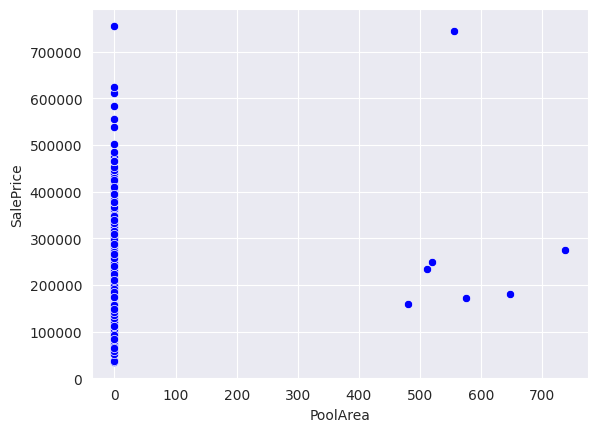

In [65]:
sns.scatterplot(x=df3['PoolArea'], y=target,color='blue')

In [66]:
df3.query('PoolArea > 400')
# 197, 810, 1170, 1182, 1298, 1386, 1423, 2503, 2599, 2710

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
197,75,RL,174.000000,25419,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,BrkFace,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036.0,LwQ,184.0,140.0,1360.0,GasA,Gd,Y,SBrkr,1360,1360,392,3112,1.0,1.0,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2.0,795.0,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,None,0,3,2006,WD,Abnorml
810,20,RL,78.000000,10140,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1999,Hip,CompShg,HdBoard,HdBoard,BrkFace,99.0,TA,TA,CBlock,TA,TA,No,ALQ,663.0,LwQ,377.0,0.0,1040.0,GasA,Fa,Y,SBrkr,1309,0,0,1309,1.0,0.0,1,1,3,1,Gd,5,Typ,1,Fa,Attchd,1974.0,RFn,2.0,484.0,TA,TA,Y,265,0,0,0,0,648,Fa,GdPrv,None,0,1,2006,WD,Normal
1170,80,RL,76.000000,9880,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,BrkFace,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,522.0,Unf,0.0,574.0,1096.0,GasA,TA,Y,SBrkr,1118,0,0,1118,1.0,0.0,1,0,3,1,TA,6,Typ,1,Po,Attchd,1977.0,Fin,1.0,358.0,TA,TA,Y,203,0,0,0,0,576,Gd,GdPrv,None,0,7,2008,WD,Normal
1182,60,RL,160.000000,15623,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,BrkFace,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096.0,Unf,0.0,300.0,2396.0,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1.0,0.0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3.0,813.0,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,None,0,7,2007,WD,Abnorml
1298,60,RL,313.000000,63887,Pave,None,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,None,None,0,1,2008,New,Partial
1386,60,RL,80.000000,16692,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,7,5,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,184.0,TA,TA,CBlock,Gd,TA,No,BLQ,790.0,LwQ,469.0,133.0,1392.0,GasA,TA,Y,SBrkr,1392,1392,0,2784,1.0,0.0,3,1,5,1,Gd,12,Typ,2,TA,Attchd,1978.0,RFn,2.0,564.0,TA,TA,Y,0,112,0,0,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal
1423,80,RL,69.305795,19690,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,SLvl,6,7,1966,1966,Flat,Tar&Grv,Plywood,Plywood,BrkFace,0.0,Gd,Gd,CBlock,Gd,TA,Av,Unf,0.0,Unf,0.0,697.0,697.0,GasA,TA,Y,SBrkr,1575,626,0,2201,0.0,0.0,2,0,4,1,Gd,8,Typ,1,Gd,Attchd,1966.0,Unf,2.0,432.0,Gd,Gd,Y,586,236,0,0,0,738,Gd,GdPrv,None,0,8,2006,WD,Alloca
2503,50,RL,104.000000,23920,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,1Fam,1.5Fin,6,5,1984,1984,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1105.0,1105.0,GasA,Ex,Y,SBrkr,1105,717,0,1822,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Po,Attchd,1984.0,Unf,2.0,515.0,TA,TA,P,0,195,1012,0,0,444,None,None,None,0,4,2007,WD,Normal
2599,20,RL,200.000000,43500,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,3,5,1953,1953,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,2034,0,0,2034,0.0,0.0,1,0,2,1,TA,9,Min1,0,None,2Types,1953.0,RFn,4.0,1041.0,TA,TA,N,483,266,0,0,0,561,None,GdPrv,None,0,6,2007,

<Axes: xlabel='MiscVal', ylabel='SalePrice'>

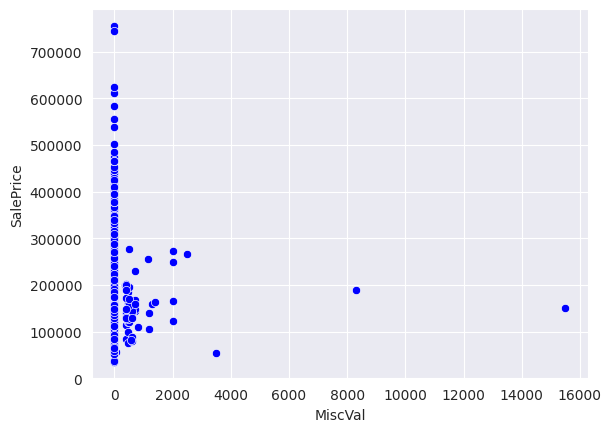

In [67]:
sns.scatterplot(x=df3['MiscVal'], y=target,color='blue')

In [68]:
df3.query('MiscVal > 6000')
# 346, 1230, 1461, 2073, 2549

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
346,20,RL,69.305795,12772,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,1960,1998,Hip,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,Gd,CBlock,TA,TA,Mn,BLQ,498.0,Unf,0.0,460.0,958.0,GasA,TA,Y,SBrkr,958,0,0,958,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1960.0,RFn,1.0,301.0,TA,TA,Y,0,0,0,0,0,0,None,None,Gar2,15500,4,2007,WD,Normal
1230,90,RL,69.305795,18890,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,BrkFace,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498.0,Rec,211.0,652.0,1361.0,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0.0,0.0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2.0,600.0,TA,TA,N,155,24,145,0,0,0,None,None,Gar2,8300,8,2007,WD,Normal
1461,20,RL,81.000000,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2073,20,RL,76.000000,11355,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,7,1958,2001,Gable,Tar&Grv,HdBoard,HdBoard,BrkFace,125.0,TA,TA,CBlock,TA,TA,No,BLQ,637.0,Unf,0.0,675.0,1312.0,GasA,Ex,Y,SBrkr,1312,0,0,1312,0.0,0.0,1,1,3,1,TA,6,Typ,1,Gd,Attchd,1958.0,RFn,2.0,495.0,TA,TA,Y,0,304,144,0,0,0,None,MnPrv,Othr,6500,4,2008,WD,Normal
2549,20,RL,128.000000,39290,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,None,None,None,17000,10,2007,New,Partial


<Axes: xlabel='MoSold', ylabel='SalePrice'>

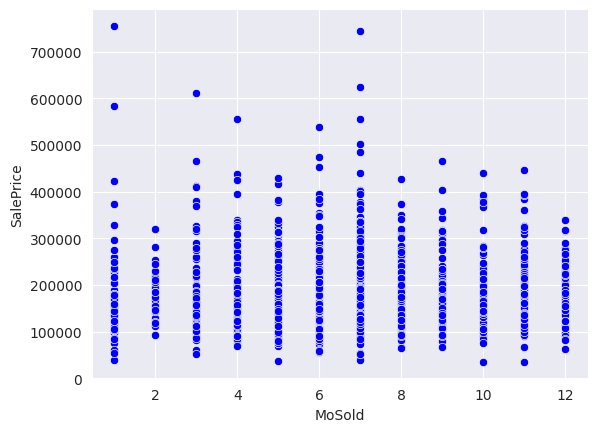

In [69]:
sns.scatterplot(x=df3['MoSold'], y=target,color='blue')

<Axes: xlabel='YrSold', ylabel='SalePrice'>

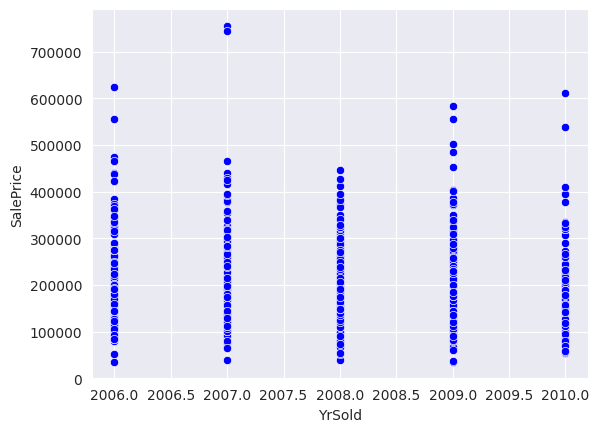

In [70]:
sns.scatterplot(x=df3['YrSold'], y=target,color='blue')

<center><h1><font color='green'><b>Remove Outliears</b></font></h1></center>

In [71]:
df4 = df3.drop([934, 1298, 249, 313, 335, 378,297, 1169,1298, 2549,322,1698,2682,1298, 2549, 1785, 2130,523,691,1182,
                1298,2549,635,635,581,1190,1298,1955,2071,2161,495,583,1328,2486,2549,2557,197, 1785, 2503, 2567, 2880,
                197, 810, 1170, 1182, 1298, 1386, 1423, 2503, 2599, 2710,346, 1230, 1461, 2073, 2549],axis=0)

<center><h1><font color='green'><b>Log Transform for Skewed Features</b></font><h1></center>

In [72]:
df5 = pd.DataFrame(df4.select_dtypes(np.number).columns, columns=['Feature'])
df5['Skew'] = df5['Feature'].apply(lambda feature: scipy.stats.skew(df4[feature]))
df5['Absolute Skew'] = df5['Skew'].apply(abs)
df5['Skewed'] = df5['Absolute Skew'].apply(lambda x:True if x >=0.5 else False)
df5

,Feature,Skew,Absolute Skew,Skewed
0,LotFrontage,0.596610,0.596610,True
1,LotArea,5.504612,5.504612,True
2,OverallQual,0.171845,0.171845,False
3,OverallCond,0.576195,0.576195,True
4,YearBuilt,-0.602547,0.602547,True
5,YearRemodAdd,-0.452739,0.452739,False
6,MasVnrArea,2.408933,2.408933,True
7,BsmtFinSF1,0.825916,0.825916,True
8,BsmtFinSF2,4.013820,4.013820,True
9,BsmtUnfSF,0.919972,0.919972,True


In [73]:
for column in df5.query("Skewed == True")['Feature'].values:
    df4[column] = np.log1p(df4[column])

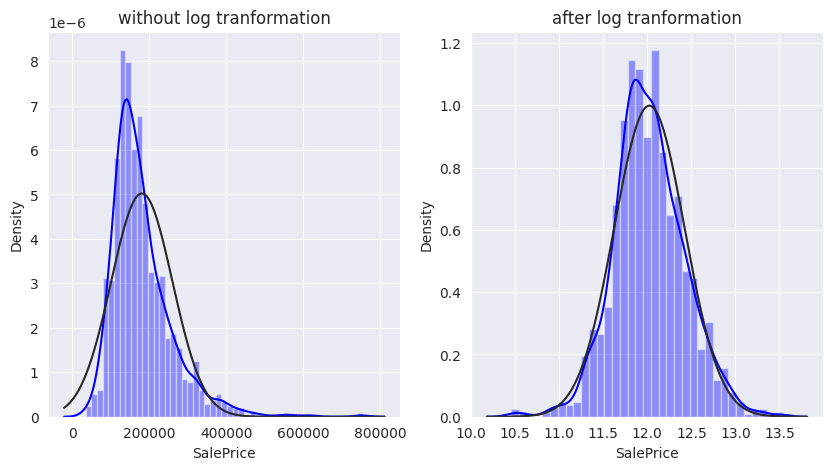

In [74]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(target,kde=True,fit=scipy.stats.norm, color='blue')
plt.title('without log tranformation')


plt.subplot(1,2,2)
sns.distplot(np.log(target),kde=True,fit=scipy.stats.norm, color='blue')
plt.title('after log tranformation')

plt.show()

In [75]:
log_target = np.log(target)

In [76]:
df4.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,4.189655,9.042040,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,7.602900,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,856.0,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,Gd,2.197225,Typ,0.000000,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.000000,4.127134,0.000000,0.0,0.0,0.0,None,None,None,0.0,2,2008,WD,Normal
1,20,RL,4.394449,9.169623,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,2.197225,7.589336,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,1262.0,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,TA,1.945910,Typ,0.693147,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,5.700444,0.000000,0.000000,0.0,0.0,0.0,None,None,None,0.0,5,2007,WD,Normal
2,60,RL,4.234107,9.328212,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,7.601902,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,920.0,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,Gd,1.945910,Typ,0.693147,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.000000,3.761200,0.000000,0.0,0.0,0.0,None,None,None,0.0,9,2008,WD,Normal
3,70,RL,4.110874,9.164401,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1.791759,7.557995,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,756.0,GasA,Gd,Y,SBrkr,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,Gd,2.079442,Typ,0.693147,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.000000,3.583519,5.609472,0.0,0.0,0.0,None,None,None,0.0,2,2006,WD,Abnorml
4,60,RL,4.442651,9.565284,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,1.791759,7.601402,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,1145.0,GasA,Ex,Y,SBrkr,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,Gd,2.302585,Typ,0.693147,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,5.262690,4.442651,0.000000,0.0,0.0,0.0,None,None,None,0.0,12,2008,WD,Normal


<center><h1><font color='green'><b>Encoding</b></font></h1></center>

In [77]:
# ode
ode_cols = [['LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure' ,'BsmtFinType1',
 'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageFinish','GarageCond','CentralAir','Functional',
 'GarageFinish','PavedDrive','CentralAir','PoolQC']]


ode = OrdinalEncoder()
for columns in ode_cols:
    df4[columns] = ode.fit_transform(df4[columns])

In [78]:
df4.select_dtypes('object').columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'Electrical', 'GarageType', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [79]:
ohe_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'Electrical', 'GarageType', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition']
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder()
# df4[ohe_cols] = ohe.fit_transform(df4[ohe_cols])
# for col in ohe_cols:
#     df4[col] = ohe.fit_transform(df4[col])
# pd.get_dummies(df4,dtype='int')

In [80]:
df6 = df4.copy()

In [81]:
df6 = pd.get_dummies(df4)

In [82]:
df6

,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,3.0,3.0,0.0,0.0,7,1.791759,7.602900,2003,5.283204,2.0,4.0,2.0,4.0,3.0,2.0,6.561031,6.0,0.0,5.017280,856.0,0.0,1.0,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,2.0,2.197225,6.0,0.000000,3.0,2003.000000,2.0,2.0,548.0,5.0,5.0,2.0,0.000000,4.127134,0.000000,0.0,0.0,0.0,1.0,0.0000

<center><h1><font color='green'><b>Scaling</b></font></h1></center>

In [83]:
scaler = StandardScaler()
scaler.fit(df6)

df6 = pd.DataFrame(scaler.transform(df6),index=df6.index,columns = df6.columns)
df6.head()

,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.036128,-0.084021,0.742788,0.313035,-0.018647,-0.214778,0.659928,-0.438075,1.038774,0.895624,1.217194,-0.770705,0.373507,-0.544177,0.333831,0.579802,-0.532316,0.787933,0.350522,-0.359524,-0.328096,-0.447235,-0.882187,0.2689,-0.770134,1.203708,-0.111716,0.597690,1.141506,-0.248511,0.795528,1.270053,0.182853,-0.199256,

In [84]:
df6.shape

(2877, 236)

<center><h1><font color='green'><b>Spliting Data</b></font></h1></center>

In [85]:
train_final = df6.loc[:train.index.max() + 26, :].copy()
test_final = df6.loc[train.index.max() - 16:, :].reset_index(drop=True).copy()

In [86]:
len(test_final)

1459

In [87]:
log_target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

<center><h1><font color='green'><b>Train Model</b></font></h1></center>

In [88]:
models = {
    'dt_model':DecisionTreeRegressor(),
    'rfr_model':RandomForestRegressor(),
    'knn_model':KNeighborsRegressor()
}

In [98]:
models['dt_model']

DecisionTreeRegressor()

In [99]:
# from sklearn.ensemble import VotingRegressor, StackingRegressor

# voting = VotingRegressor(estimators=[('dt',models['dt_model']), ('rfr',models['rfr_model']), ('knn',models['knn_model'])])

In [100]:
voting.fit(train_final, log_target)

VotingRegressor(estimators=[('dt', DecisionTreeRegressor()),
                            ('rfr', RandomForestRegressor()),
                            ('knn', KNeighborsRegressor())])

In [103]:
final_pred = np.exp(voting.predict(test_final))

In [89]:
from sklearn.metrics import mean_squared_error

for name,model in models.items():
    fiting_data = model.fit(train_final,log_target)
    print(name + " trained. ")

dt_model trained. 
rfr_model trained. 
knn_model trained. 


<center><h1><font color='green'><b>Evaluate</b></font></h1></center>

In [90]:
results = {}

kf = KFold(n_splits=10)

for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result


In [91]:
results

{'dt_model': array([1.78685693, 1.67085641, 1.76881936, 1.94247877, 1.9500753 ,
        1.73017102, 1.79396319, 1.83767467, 1.72195852, 1.79567924]),
 'rfr_model': array([1.45166277, 1.48632914, 1.53122963, 1.55310141, 1.59163057,
        1.47131677, 1.509753  , 1.45466321, 1.48124121, 1.53097259]),
 'knn_model': array([1.50032519, 1.53816945, 1.54852487, 1.60865255, 1.65962903,
        1.50471139, 1.5345718 , 1.48186469, 1.53741634, 1.54815239])}

In [92]:
for name, result in results.items():
    print("----------\n" + name)
    print(np.mean(result))
    print(np.std(result))

----------
dt_model
1.7998533414052962
0.08549074344416248
----------
rfr_model
1.5061900287902472
0.04314613842528914
----------
knn_model
1.5462017711672413
0.05001737369257819


In [93]:
final_predictions = (
    0.4 * np.exp(models['dt_model'].predict(test_final)) +
    0.3 * np.exp(models['rfr_model'].predict(test_final)) +
    0.3 * np.exp(models['knn_model'].predict(test_final))
)

In [94]:
final_predictions

array([124527.09339345, 200448.29904782, 166932.28016488, ...,
       134187.09562794, 136509.29004038, 172994.80280781])

In [95]:
submission = pd.concat([ids, pd.Series(final_predictions, name='SalePrice')], axis=1)
submission

,Id,SalePrice
0,1461,124527.093393
1,1462,200448.299048
2,1463,166932.280165
3,1464,150659.215768
4,1465,138890.732620
...,...,...
1454,2915,114605.167879
1455,2916,135741.747228
1456,2917,134187.095628
1457,2918,136509.290040


In [96]:
# submission.to_csv('./submission.csv',index=False,header=True)